<a href="https://colab.research.google.com/github/chandu-123456/Image_classifier_model/blob/main/Image_Classification(Minor_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Gathering the data
directory='/content/drive/MyDrive/Images data'
categories=['Chair','Lion']

In [126]:
#Preprocessing
import os
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]

In [127]:
for category in categories:
  num=categories.index(category)
  path = os.path.join(directory,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) # Value gets converted from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(num)


flat_data = np.array(flat_data)
target = np.array(target)
images=np.array(images)

In [128]:
#splitting the data as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.30,random_state=100)

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc=svm.SVC(probability=True)
imageclf=GridSearchCV(svc,param_grid)
imageclf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [130]:
y_pred=imageclf.predict(x_test)
y_pred


array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [131]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [132]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)


1.0

In [133]:
 confusion_matrix(y_pred,y_test)

array([[7, 0],
       [0, 6]])

In [134]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      1.00      1.00         6\n\n    accuracy                           1.00        13\n   macro avg       1.00      1.00      1.00        13\nweighted avg       1.00      1.00      1.00        13\n'

In [135]:
import pickle 
pickle.dump(imageclf,open('img_model','wb'))

In [136]:
model=pickle.load(open('img_model','rb'))

ENTER THE URL FOR CHAIR / LION IMAGEhttps://www.krugerpark.co.za/images/black-maned-lion-shem-compion-590x390.jpg
(390, 590, 3)
Predicted output: Lion


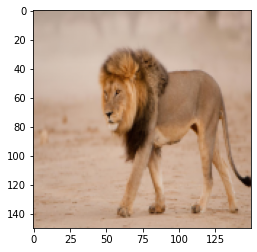

In [138]:
#TESTING
import numpy as np
flat_data=[]
url=input("ENTER THE URL FOR CHAIR / LION IMAGE")
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'Predicted output: {y_out}')